In [8]:
#
# Monte Carlo valuation of European call options with NumPy (log version)
# Monte_Carlo.py
#

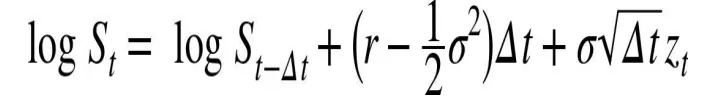

In [9]:
import math
from numpy import *
from time import time

In [10]:
# star import for shorter code

In [11]:
random.seed(20000)

In [12]:
t0 = time()

In [13]:
# Parameters
S0 = 100.; K = 105.; T = 1.0; r = 0.05; sigma = 0.2
M = 50; dt = T / M; I = 250000

In [14]:
# Simulating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * random.standard_normal((M + 1, I)), axis=0))

In [15]:
# sum instead of cumsum would also do
# if only the final values are of interest
S[0] = S0

In [16]:
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
# Results output
tnp2 = time() - t0

In [17]:
print('The European Option Value is: ', C0)

The European Option Value is:  8.165807966259603


In [18]:
print('The Execution Time is: ',tnp2)

The Execution Time is:  177.87857961654663


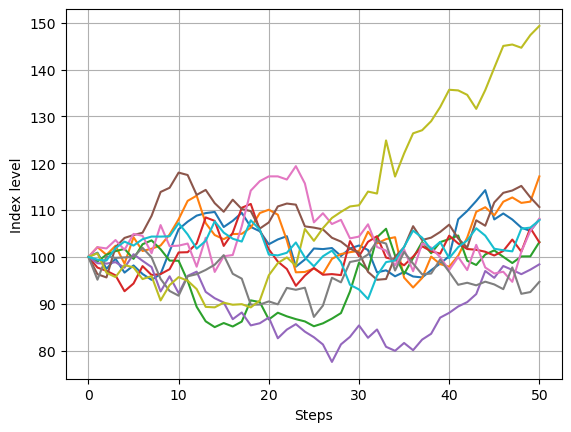

In [19]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Index level')
plt.show()

Text(0, 0.5, 'frequency')

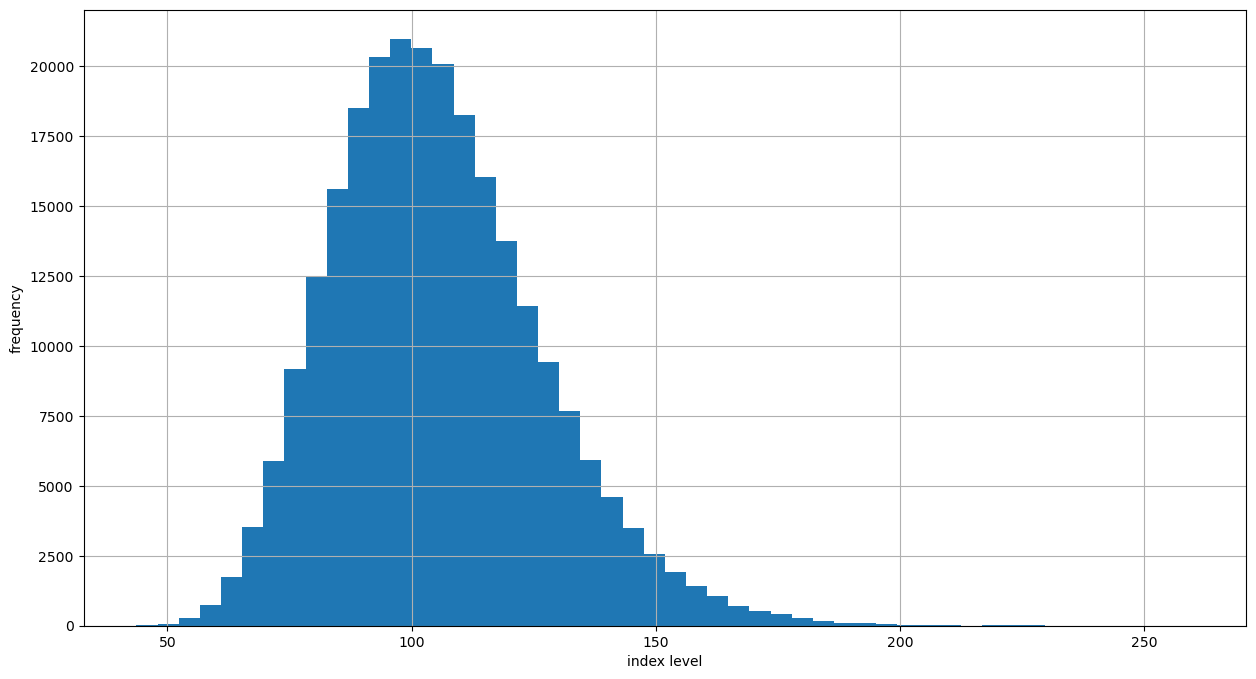

In [20]:
plt.rcParams["figure.figsize"] = (15,8)
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

(0.0, 50000.0)

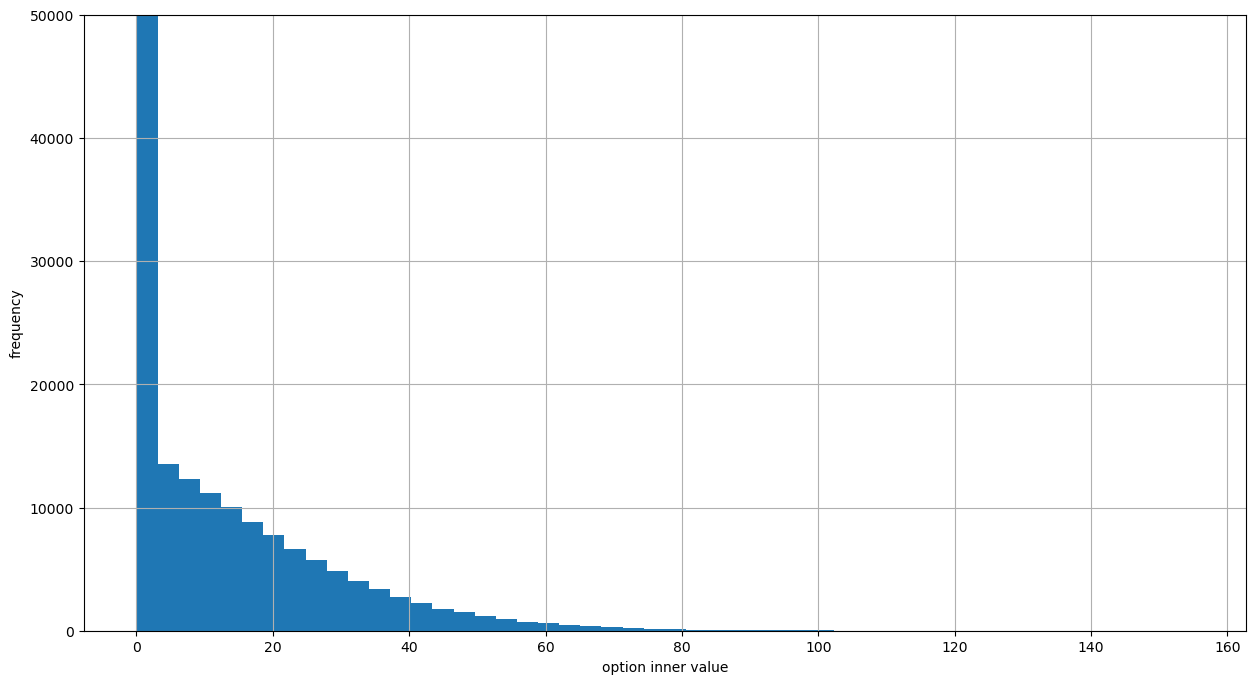

In [21]:
import numpy as np
plt.rcParams["figure.figsize"] = (15,8)
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000)